<a href="https://colab.research.google.com/github/JOJUNHYUNG0818/ai/blob/%2BdeepL/handNumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [30]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [25]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [15]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [31]:
# 모델만들기
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 1차원으로 평탄화 (입력층)
  tf.keras.layers.Dense(128, activation='relu'), # 은닉층 (뉴런수, 활성화함수, ex)input_shape=(13,) 13은 데이터 프레임의 열의수)
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# 성능이 제일 좋은 모델 저장하기 digits_model.h5


# 모델 체크포인트 콜백 정의
checkpoint =tf.keras.callbacks.ModelCheckpoint(filepath='mnist_ditgits_model.h5',
                             save_best_only=True,  # 최상의 모델만 저장
                             verbose=1)  # 저장 메시지 표시

# 학습시에 조기 종료 조건 명사
monitor_val_loss =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표 (기본값: 'val_loss')
    min_delta=0,         # 개선되었다고 판단할 최소 변화량 (기본값: 0)
    patience=5,          # 성능이 개선되지 않더라도 학습을 멈출 때까지 기다리는 에포크 수 (기본값: 0)
    verbose=0,           # 메시지 출력 레벨 (0, 1, 2 중 하나 선택, 기본값: 0)
    mode='auto',         # 모델 성능을 비교할 때 'min', 'max', 'auto' 중 하나 선택 (기본값: 'auto')
    baseline=None,       # 모델 성능의 기준값 (기본값: None)
    restore_best_weights=False  # 학습 중에 모델의 최상의 가중치를 복원할지 여부 (기본값: False)
)



In [21]:
x_train.shape
y_train.shape

(60000, 10)

In [33]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_split=0.01,
                    validation_data=(x_test,y_test),
                    shuffle=True,
                    callbacks=[checkpoint,monitor_val_loss])

Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 2.5924 - accuracy: 0.7684
Epoch 1: val_loss improved from inf to 0.59516, saving model to mnist_ditgits_model.h5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5871 - accuracy: 0.7686 - val_loss: 0.5952 - val_accuracy: 0.8628
Epoch 2/10
  52/1875 [..............................] - ETA: 5s - loss: 0.6449 - accuracy: 0.8275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - ETA: 0s - loss: 0.6263 - accuracy: 0.8482
Epoch 2: val_loss improved from 0.59516 to 0.44410, saving model to mnist_ditgits_model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6263 - accuracy: 0.8482 - val_loss: 0.4441 - val_accuracy: 0.9155
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.4760 - accuracy: 0.8816
Epoch 3: val_loss improved from 0.44410 to 0.33177, saving model to mnist_ditgits_model.h5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4760 - accuracy: 0.8816 - val_loss: 0.3318 - val_accuracy: 0.9288
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.4341 - accuracy: 0.8896
Epoch 4: val_loss improved from 0.33177 to 0.29075, saving model to mnist_ditgits_model.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4339 - accuracy: 0.8896 - val_loss: 0.2908 - val_accuracy: 0.9321
Epoch 5/10
1869/1875 [=======================

In [39]:
y_train[2]

4

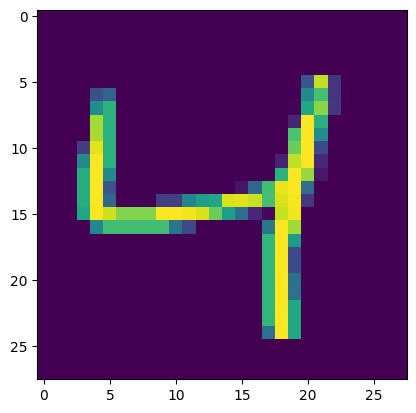

In [38]:
import cv2 as cv
plt.imshow(x_train[2])

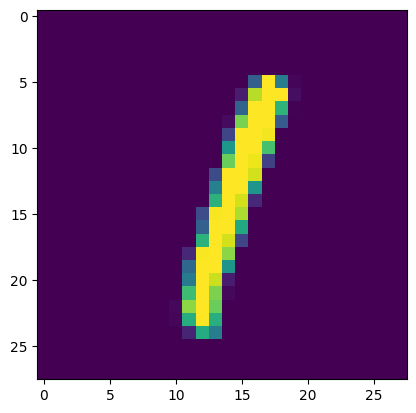

In [44]:
plt.imshow(x_test[5])

In [49]:
x_train[0].shape

(28, 28)

In [43]:
# 모델 예측하기
# Predict Model
import numpy as np
selected_digit = 5

result = model.predict(np.array([x_test[selected_digit]]))
result_number = np.argmax(result) # result 중 가장 큰값 [5]
y_test_digit = y_test[selected_digit]
y_test_number = np.argmax(y_test_digit)
print(result, result_number)
print(y_test_digit, y_test_number)

1/1 [==============================] - 0s 77ms/step
[[0.0000000e+00 1.0000000e+00 1.5899704e-21 2.3812085e-28 1.9509776e-16
  7.1907530e-18 1.4097688e-15 1.9931645e-12 1.7480856e-15 1.9448187e-30]] 1
1 0


<나의 손글씨 모델학습>

In [48]:
frame='236.jpg'
img = cv.imread(frame)
img.shape

(482, 675, 3)

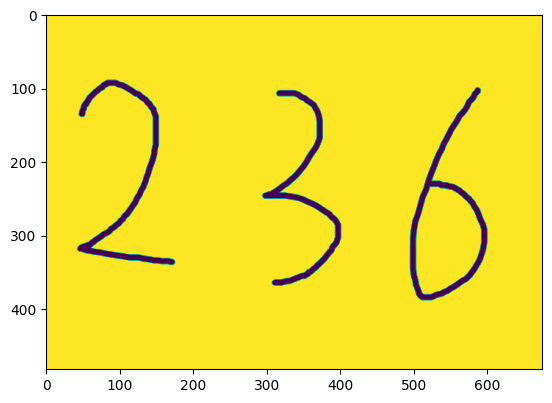

In [57]:
# hsv transform - value = gray image
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value = cv.split(hsv)
plt.imshow(value)

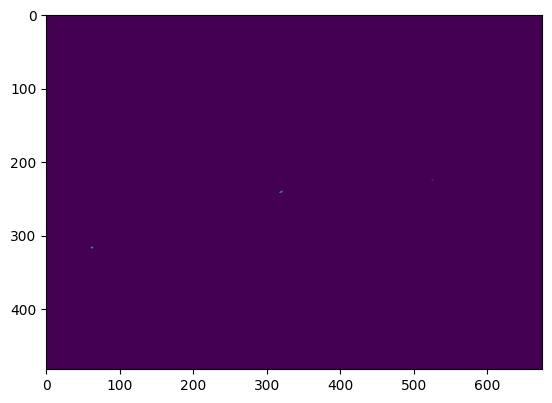

In [58]:
# kernel to use for morphological operations
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

# applying topHat operations
topHat = cv.morphologyEx(value, cv.MORPH_TOPHAT, kernel)
plt.imshow(topHat)

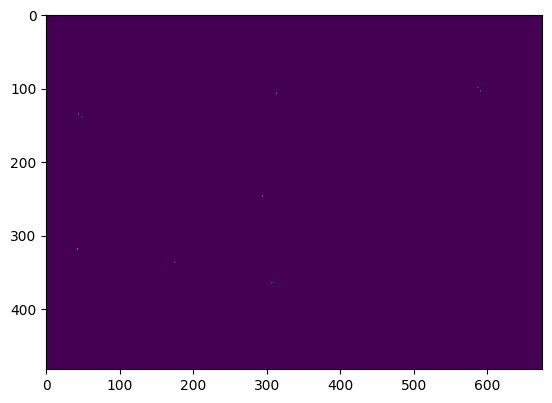

In [59]:
# applying blackHat operations
blackHat = cv.morphologyEx(value, cv.MORPH_BLACKHAT, kernel)
plt.imshow(blackHat)

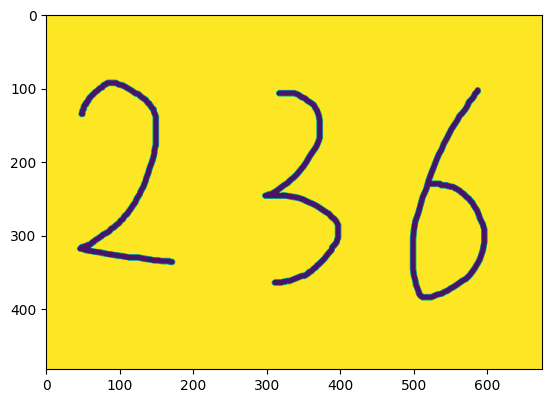

In [60]:
# add and subtract between morphological operations
add = cv.add(value, topHat)
subtract = cv.subtract(add, blackHat)
plt.imshow(subtract)

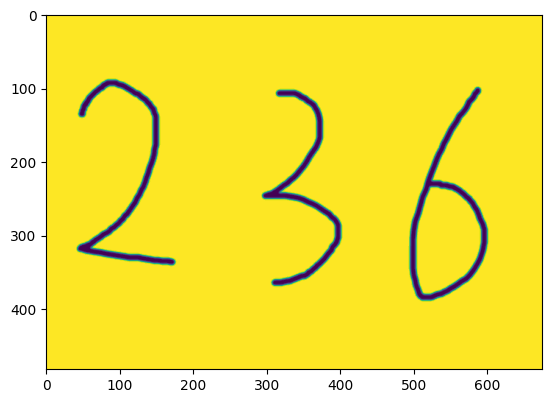

In [61]:
# applying gaussian blur on subtract image
blur = cv.GaussianBlur(subtract, (5, 5), 0)
plt.imshow(blur)

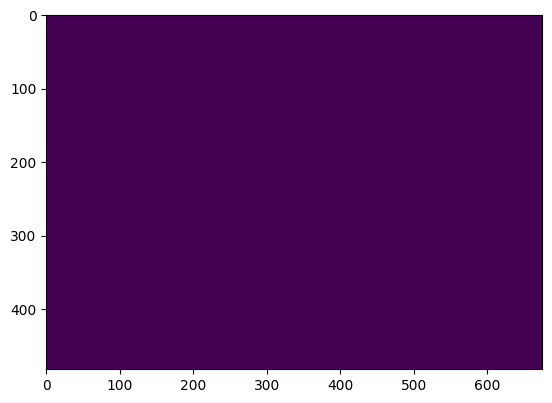

In [63]:
# thresholding
thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 19, 9)
plt.imshow(thresh)

In [64]:
# cv2.findCountours() function changed from OpenCV3 to OpenCV4: now it have only two parameters instead of 3
cv2MajorVersion = cv.__version__.split(".")[0]
print('openCV version : ', cv2MajorVersion)
# check for contours on thresh
if int(cv2MajorVersion) >= 4:
    contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
else:
    imageContours, contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

openCV version :  4
